<a href="https://colab.research.google.com/github/DenZhid/TelecommunicationSystemsLabs/blob/main/Lab1/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Зависимости**

In [1]:
import os
import matplotlib.pyplot as plt
from IPython.display import Audio
from IPython.display import display

if not os.path.exists('thinkdsp.py'):
  !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import CosSignal, SinSignal
from thinkdsp import read_wave

if not os.path.exists('338986__drfx__music-box-melody-1.wav'):
  !wget https://github.com/DenZhid/TelecommunicationSystemsLabs/raw/main/Lab1/resources/338986__drfx__music-box-melody-1.wav

--2022-05-24 11:18:16--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-05-24 11:18:16--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.01s   

2022-05-24 11:18:16 (4.56 MB/s) - ‘thinkdsp.py’ saved [48687/48687]

--2022-05-24 11:18:17--  https://github.com/DenZhid

# **Упражнение 1.1**
Прочитать пояснения и запустить примеры в https://colab.research.google.com/github/AllenDowney/ThinkDSP/blob/master/code/chap01.ipynb .

**Ход работы:**

По представленной ссылке была изучена работа примеров.

# **Упражнение 1.2**

Скачайте с сайта http://freesound.org образец звука, включающий музыку, речь или иные звуки, имеющие четко выраженную высоту. Выделите примерно полуcекундный сегмент, в котором высота постоянная. Вычислите и распечатайте спектр выбранного сегмента. Как связаны тембр звука и гармоническая структура, видимая в спектре?

Используйте *high_pass*, *low_pass* и *band_stop* для фильтрации тех или иных гармоник. Затем преобразуйте спектры обратно в сигнал и послушайте его. Как звук соотноситься с изменениями, сделанными в спектре?

**Ход работы:**

В качестве исходного звука мною был выбран звук детской игрушки.


In [2]:
wave = read_wave('338986__drfx__music-box-melody-1.wav')
wave.normalize()
wave.make_audio()

Посмотрим на график звука.

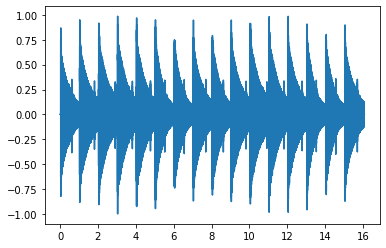

In [3]:
wave.plot()

Видим, что для наших целей примерно подходит временной промежутке от 0 до 0.5 с. Выделим его в отдельный сегмент.

In [4]:
segment = wave.segment(start=0, duration=0.5)
segment.make_audio()

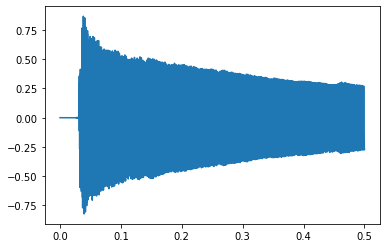

In [5]:
segment.plot()

Распечатаем спектр сегмента и проанализируем его.

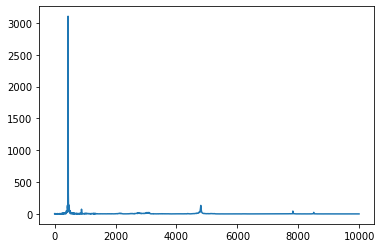

In [6]:
spectrum = segment.make_spectrum()
spectrum.plot(high=10000)

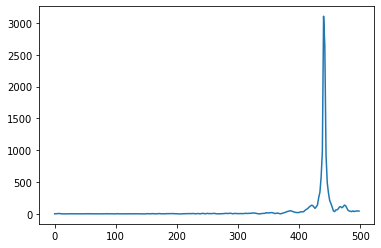

In [7]:
spectrum.plot(high=500)

In [8]:
spectrum.peaks()[:30]

[(3105.2774588882776, 440.0),
 (2643.91336339852, 442.0),
 (982.9510598236191, 438.0),
 (928.018195867917, 444.0),
 (581.1827879290163, 436.0),
 (488.8008118301294, 446.0),
 (340.42790675014993, 434.0),
 (326.9018494124598, 448.0),
 (256.52169521101825, 432.0),
 (210.32985553963465, 450.0),
 (163.0675958480812, 452.0),
 (141.98370455438047, 430.0),
 (138.47256175435174, 474.0),
 (135.5220113357201, 420.0),
 (133.4402047206871, 4800.0),
 (133.16144529881723, 422.0),
 (130.9784194813805, 476.0),
 (121.50761832575193, 4798.0),
 (120.22221745511368, 4802.0),
 (119.99141184463748, 418.0),
 (114.28077990027248, 4796.0),
 (112.9720584363705, 468.0),
 (112.72915819623454, 472.0),
 (111.28578585448173, 424.0),
 (111.10076052391359, 428.0),
 (110.35944145659276, 466.0),
 (110.25142863334469, 454.0),
 (109.79320052148987, 4804.0),
 (107.68634220841045, 4794.0),
 (104.87870928895984, 416.0)]

На вышеописанных графиках можно наблюдать несколько частотных компонент. Конкретно для моего звука их количество невелико и сильно выделяется лишь один доминантный пик с частотой 440 Гц. Так как данный пик выделен гораздо сильнее остальных, то во время прослушивания данного звука мы не можем уловить других присутствующих частотных компонент. Тембр звука зависит не только от наличия в нём различных частотных тонов, но и от их соотношения по громкости и присутсвии или отсутсвии в спектре звучания основного тона. 

Теперь используем *high_pass*, *bass_pass* и *band_stop* для фильтрации различных гармоник.

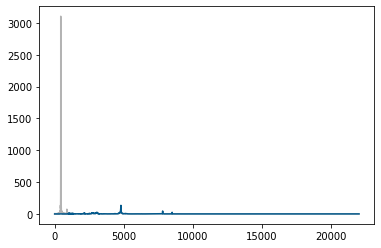

In [9]:
spectrum = segment.make_spectrum()
spectrum.plot(color='0.7')
spectrum.high_pass(1000)
spectrum.plot(color='#045a8d')
plt.show()

audio = spectrum.make_wave().make_audio()
display(audio)

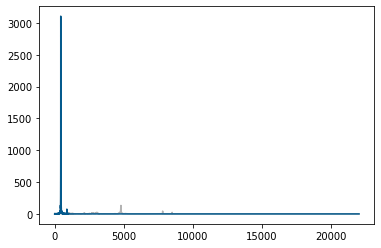

In [10]:
spectrum = segment.make_spectrum()
spectrum.plot(color='0.7')
spectrum.low_pass(1000)
spectrum.plot(color='#045a8d')
plt.show()

audio = spectrum.make_wave().make_audio()
display(audio)

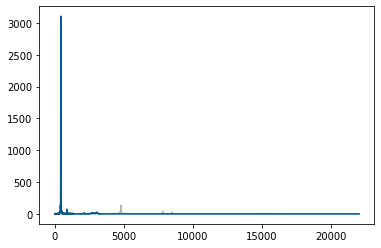

In [11]:
spectrum = segment.make_spectrum()
spectrum.plot(color='0.7')
spectrum.band_stop(4500, 10000)
spectrum.plot(color='#045a8d')
plt.show()

audio = spectrum.make_wave().make_audio()
display(audio)

Как видно из графиков и слышно при прослушвании *low_pass* - срезал частоты ниже частоты среза, *high_pass* - срезал частоты выше частоты среза, а *band_stop* - срезал все частоты в указанной полосе частот.

# **Упражнение 1.3**

Создайте сложный сигнал из объектов *SinSignal* и *CosSignal* суммируя их. Обработайте сигнал для получения *wave* и прослушайте его. Вычислите *Spectrum* и распечатайте. Что произойдёт при добавлении частотных компонент, не кратных основным?

**Ход работы:**

In [12]:
cos_sig = (CosSignal(freq=220, amp=2.0, offset=0) +
           CosSignal(freq=880, amp=1.0, offset=0))
sin_sig = (SinSignal(freq=550, amp=0.5, offset=1.5) +
           SinSignal(freq=1100, amp=1.5, offset=1.5))

mix = sin_sig + cos_sig
wave = mix.make_wave(duration=2, start=0, framerate=11025)
wave.make_audio()

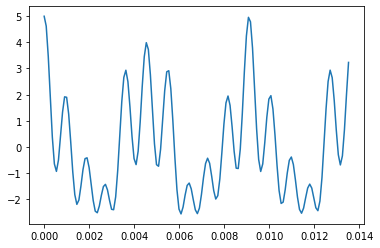

In [13]:
mix.plot()

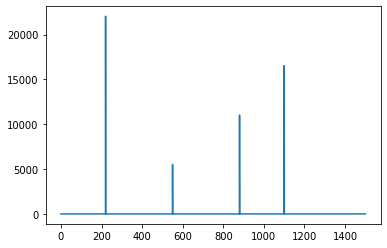

In [14]:
spectrum = wave.make_spectrum()
spectrum.plot(high=1500)

Попробуем добавить частоту не кратную основным.

In [15]:
mix += SinSignal(freq=484)
mix.make_wave().make_audio()

Добавив частотную компонентну не кратную основным мы теперь можем явно услышать инородный звук в основном звуке (тембр звука изменился).

# **Упражнени 1.4**

Напишите функцию *stretch*, берущую *wave* и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением *ts* и *framerate*. Подсказака: должно получиться всего две строки кода.

**Ход работы:**

Напишу оба вариант функции. При увеличении в *coeff* *ts* и уменьшении в этот же коэффициент *framerate* звук будет замедляться, а при обратном алгоритме - ускоряться.

In [16]:
def stretch_slower(wave, factor):
  wave.ts *= factor
  wave.framerate /= factor

def stretch_faster(wave, factor):
  wave.ts /= factor
  wave.framerate *= factor

Проверим работу функции на том же звуке, что и в упражнении 1.1.

In [17]:
wave = read_wave('338986__drfx__music-box-melody-1.wav')
wave.normalize()
wave.make_audio()

In [18]:
stretch_slower(wave, 1.5)
wave.make_audio()

In [19]:
wave = read_wave('338986__drfx__music-box-melody-1.wav')
wave.normalize()
stretch_faster(wave, 1.5)
wave.make_audio()